# 1. Getting the data

In [3]:
import gzip
import html5lib 
import json
import os
import pandas as pd
import numpy as np

In [4]:

# Listing all the JSON files in the directory
dir_yelp = '../../DataProject/yelp_dataset_challenge_round9/'
y_dirs = os.listdir(dir_yelp)

#Output dir 
#if not os.path.exists(out_dir):
#    os.makedirs(out_dir)
y_dirs


['.DS_Store',
 'Dataset_Challenge_Dataset_Agreement.pdf',
 'yelp_academic_dataset_business.json',
 'yelp_academic_dataset_review.json',
 'yelp_academic_dataset_user.json',
 'Yelp_Dataset_Challenge_Terms_round_9.pdf']

In [5]:

### This part of the code is based on Prof. Perry's code  
### http://ptrckprry.com/course/ssd/data/yelp-academic/01_make_json.py

#Setting the structures of the information
tables = {}

#'elite'

tables['user'] = {
    'fields': ['user_id', 'name', 'yelping_since', 'average_stars'],
    'subfields': {}
    }

tables['review'] = {
    'fields': ['review_id', 'business_id', 'user_id', 'date', 'stars','text'],
    'subfields': {}
    }

tables['business'] = {
    'fields': ['business_id','name', 'stars', 'is_open','categories', 'state', 'city', 
               'longitude','latitude', 'neighborhood'],
    'subfields': {}
    }



### Formatting the data in Dataframes

In [6]:

def unescape(x):
    if isinstance(x, str):
        x = html.unescape(x)
    return x

reviews_ext= []
user_ext = []
business_ext = []

for y_dir in y_dirs:
    #The files we're interested in extracting end with ".json"
    r1 = int('user' in  y_dir)
    r2 = int('review' in y_dir )
    r3 = int('business' in y_dir )
    if y_dir.endswith('.json') and (r1==1 or r2==1 or r3==1)  :
        print dir_yelp + y_dir
        with open(dir_yelp+ y_dir, 'r') as dataset:
            #Extracting the lines and formatting accordingly
            for line in dataset:
                obj = json.loads(line.decode('utf-8'))
                tab = tables[obj['type']]
                record = {}
                #print(line)
                for i in tab['fields']:
                    #print(i)
                    if i in tab['subfields']:
                        record[i] = {}
                        for j in tab['subfields'][i]:
                            record[i][j] = unescape(obj[i][j])
                    else:
                        record[i] = unescape(obj[i])
                if 'review_id' in record: #IS REVIEW
                    reviews_ext.append(record)
                if 'yelping_since' in record: #IS USER
                    user_ext.append(record)
                if 'neighborhood' in record:  #IS BUSINESS
                    business_ext.append(record)
                    
print("ENDED!")

../../DataProject/yelp_dataset_challenge_round9/yelp_academic_dataset_business.json
../../DataProject/yelp_dataset_challenge_round9/yelp_academic_dataset_review.json
../../DataProject/yelp_dataset_challenge_round9/yelp_academic_dataset_user.json
ENDED!


In [7]:

users = pd.DataFrame(user_ext)
businesses = pd.DataFrame(business_ext)
reviews = pd.DataFrame(reviews_ext)


In [8]:

def getDfSummary(input_data):
    # Get a whole bunch of stats
    output_data = input_data.describe().transpose()
    # Count NANs
    output_data['number_nan'] = input_data.shape[0] - output_data['count']
    # Type of data
    output_data['types'] = [type(input_data[i][0]).__name__ for i in output_data.index]
    # Count unique valuesc
    distincts = []
    for i in output_data.index:
        if isinstance(input_data[i][0], list):
            distincts.append(np.nan)
        else:
            distincts.append(len(input_data[i].unique()))
    output_data['number_distinct'] = distincts
    # Remove 'count' column since it wasn't asked for
    output_data = output_data.drop('count', 1)
    return output_data


### Users' Dataset

In [9]:

users.tail()


,average_stars,name,user_id,yelping_since
1029427,5.0,Marcia,mZ4V8gAjQYLWdPiPkhWnPA,2015-01-09
1029428,5.0,Cathy,z3XH6YdJnz_3kmNMFuB70A,2016-07-19
1029429,2.0,Hannah,s1l_dY8eGvwMqQNvQXeqNg,2015-11-11
1029430,5.0,Angel,qNdPduox3xNycsWDJRCFLA,2015-07-31
1029431,5.0,Al,vp0L6e84U7tBFpmOpsD8RQ,2015-09-25


In [10]:

name_datetime_variable = 'yelping_since'
users[name_datetime_variable] = pd.to_datetime(users[name_datetime_variable])
users[name_datetime_variable+'_year'] = pd.DatetimeIndex(users[name_datetime_variable]).year
users[name_datetime_variable+'_month'] = pd.DatetimeIndex(users[name_datetime_variable]).month
users[name_datetime_variable+'_day'] = pd.DatetimeIndex(users[name_datetime_variable]).day


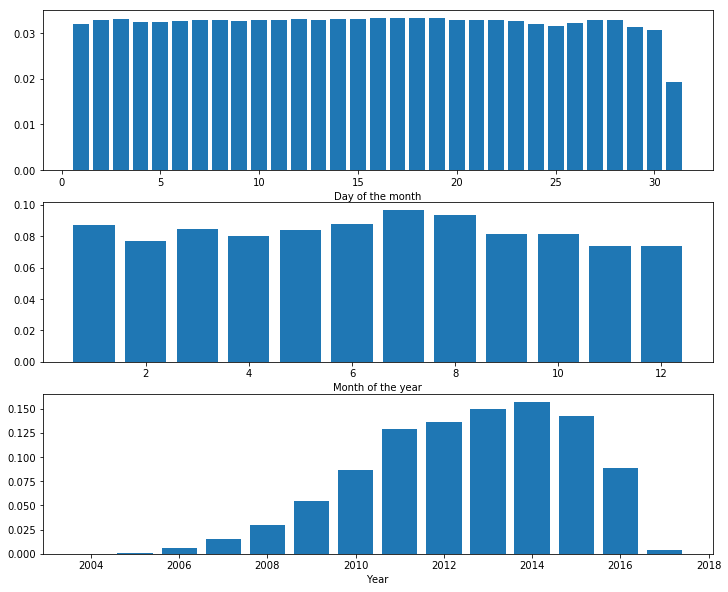

In [11]:

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))

plt.subplot(311)
frequ_values = (users.yelping_since_day.value_counts()/users.yelping_since_day.value_counts().sum()).sort_index()
plt.bar(frequ_values.index,frequ_values)
plt.xlabel("Day of the month",verticalalignment='top')

plt.subplot(312)
frequ_values = (users.yelping_since_month.value_counts()/users.yelping_since_month.value_counts().sum()).sort_index()
plt.bar(frequ_values.index,frequ_values)
plt.xlabel("Month of the year",verticalalignment='top')

plt.subplot(313)
frequ_values = (users.yelping_since_year.value_counts()/users.yelping_since_year.value_counts().sum()).sort_index()
plt.bar(frequ_values.index,frequ_values)
plt.xlabel("Year",verticalalignment='top')

plt.show()


In [12]:
getDfSummary(users)

,mean,std,min,25%,50%,75%,max,number_nan,types,number_distinct
average_stars,3.709147,1.097177,1.0,3.13,3.88,4.55,5.0,0.0,float64,398
yelping_since_year,2012.569855,2.306572,2004.0,2011.00,2013.00,2014.00,2017.0,0.0,int32,14
yelping_since_month,6.420439,3.373801,1.0,4.00,6.00,9.00,12.0,0.0,int32,12
yelping_since_day,15.741980,8.792139,1.0,8.00,16.00,23.00,31.0,0.0,int32,31


In [13]:

user_variables = ['user_id','average_stars','yelping_since_year']


### Business' Dataset

In [14]:

businesses.tail(3)


,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,stars,state
144069,5GslSGCDT3gXei0kKR-P3g,"[Food, Ice Cream & Frozen Yogurt]",Phoenix,0,33.626005,-111.977799,Yin Yang Self Serve Frozen Yogurt,,4.5,AZ
144070,z0GwhlBflcCnVdACU9tQxQ,"[Restaurants, Hot Dogs]",Phoenix,0,33.640348,-111.969566,Famous Uncle Al's Hot Dogs and Grille,,4.0,AZ
144071,a048R60CLFeObJ3mhHdPRg,"[Shopping, Mobile Phones]",Phoenix,1,33.602173,-111.983636,T-Mobile,,3.0,AZ


In [15]:

getDfSummary(businesses)


,mean,std,min,25%,50%,75%,max,number_nan,types,number_distinct
is_open,0.850304,0.356774,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,int64,2
latitude,38.644758,5.344079,32.998019,33.627346,36.143417,43.611192,57.592285,0.0,float64,115313
longitude,-92.690002,26.898355,-122.397206,-112.136907,-89.523207,-79.649855,115.086769,0.0,float64,115691
stars,3.637709,0.969585,1.000000,3.000000,3.500000,4.500000,5.000000,0.0,float64,9


In [16]:

dummies_cities = pd.get_dummies(businesses['state'], dummy_na=False, prefix='state', prefix_sep='_')
businesses_dumm = pd.concat([businesses, dummies_cities], axis=1)

dummies_states = pd.get_dummies(businesses['city'], dummy_na=False, prefix='city', prefix_sep='_')
businesses_dumm = pd.concat([businesses_dumm, dummies_states], axis=1)

dummies_neighborhood = pd.get_dummies(businesses['neighborhood'], dummy_na=False, prefix='neighborhood', prefix_sep='_')
businesses_dumm = pd.concat([businesses_dumm, dummies_neighborhood], axis=1)

businesses_dumm = businesses_dumm.drop(['city','state','neighborhood'],axis=1)
businesses_dumm.tail(3)


,business_id,categories,is_open,latitude,longitude,name,stars,state_AZ,state_BW,state_EDH,...,neighborhood_Willowdale,neighborhood_Windemere,neighborhood_Windgap,neighborhood_Woodbridge,neighborhood_Woodland Hills,neighborhood_Worthington Park,neighborhood_Wychwood,neighborhood_Yonge and Eglinton,neighborhood_Yonge and St. Clair,neighborhood_Yorkville
144069,5GslSGCDT3gXei0kKR-P3g,"[Food, Ice Cream & Frozen Yogurt]",0,33.626005,-111.977799,Yin Yang Self Serve Frozen Yogurt,4.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
144070,z0GwhlBflcCnVdACU9tQxQ,"[Restaurants, Hot Dogs]",0,33.640348,-111.969566,Famous Uncle Al's Hot Dogs and Grille,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
144071,a048R60CLFeObJ3mhHdPRg,"[Shopping, Mobile Phones]",1,33.602173,-111.983636,T-Mobile,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:

'''
.apply(Series)    converts the series of lists to a dataframe
.stack()          puts everything in one column again (creating a multi-level index)
pd.get_dummies( ) creating the dummies
.sum(level=0)     for remerging the different rows that should be one row 
                  (by summing up the second level, only keeping the original level (level=0))               
'''

dummies_categories = pd.get_dummies(businesses['categories'].apply(pd.Series).stack()).sum(level=0)

prefix = 'catBiz_'
new_columns = []
for i in dummies_categories.columns:
    new_columns.append( prefix+i )
    
dummies_categories.columns = new_columns
    
    
businesses_sparse = pd.concat([businesses_dumm, dummies_categories], axis=1)
businesses_sparse = businesses_sparse.drop(['categories'],axis=1)
businesses_sparse.tail(3)


,business_id,is_open,latitude,longitude,name,stars,state_AZ,state_BW,state_EDH,state_ELN,...,catBiz_Wine Tours,catBiz_Wineries,catBiz_Wok,catBiz_Women's Clothing,catBiz_Workers Compensation Law,catBiz_Wraps,catBiz_Yelp Events,catBiz_Yoga,catBiz_Ziplining,catBiz_Zoos
144069,5GslSGCDT3gXei0kKR-P3g,0,33.626005,-111.977799,Yin Yang Self Serve Frozen Yogurt,4.5,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144070,z0GwhlBflcCnVdACU9tQxQ,0,33.640348,-111.969566,Famous Uncle Al's Hot Dogs and Grille,4.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144071,a048R60CLFeObJ3mhHdPRg,1,33.602173,-111.983636,T-Mobile,3.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:

business_variables = []
for i in businesses_sparse.columns:
    if 'catBiz' in i or 'neighborhood' in i or 'state' in i or 'city' in i or 'name' in i \
       or 'latitude' in i or 'longitude' in i or 'stars' in i or 'is_open' in i or 'id' in i:
        business_variables.append(i)


##### Categories counts

In [19]:

blended_cats = businesses['categories']
blended_cats.head()


0     [Tobacco Shops, Nightlife, Vape Shops, Shopping]
1    [Caterers, Grocery, Food, Event Planning & Ser...
2         [Restaurants, Pizza, Chicken Wings, Italian]
3    [Hair Removal, Beauty & Spas, Blow Dry/Out Ser...
4    [Hotels & Travel, Event Planning & Services, H...
Name: categories, dtype: object

In [20]:

from collections import Counter
distinct_cats = Counter()
for line in blended_cats: 
    if line!= None:
        for cat in line: 
            distinct_cats[cat] +=1
        

In [21]:

print(len(distinct_cats)) #Too many to create a category per each one


1191


### Reviews' Dataset

In [22]:

reviews.tail(3)


,business_id,date,review_id,stars,text,user_id
4153147,KYasaF1nov1bn7phfSgWeg,2015-08-15,GXQnlRo41C4WykC_IP2Lbw,5,Tui was awesome ^^ she made me an amazing jack...,rWL8bGLRPtYAhX97JnRVXg
4153148,KYasaF1nov1bn7phfSgWeg,2016-08-18,tTGXK14g6WKJx78JG3bh_w,3,Overpriced coffee without the free upgrade at ...,nS19cEYuD99dvTCYISf0oA
4153149,KYasaF1nov1bn7phfSgWeg,2014-05-26,EmuqmSacByt96t8G5GK0KQ,4,If ur into Asian desserts this is the place to...,LgpDa5gAoK2q3u4zrjdr-w


In [23]:

name_datetime_variable = 'date'
reviews[name_datetime_variable] = pd.to_datetime(reviews[name_datetime_variable])
reviews[name_datetime_variable+'_year'] = pd.DatetimeIndex(reviews[name_datetime_variable]).year
reviews[name_datetime_variable+'_month'] = pd.DatetimeIndex(reviews[name_datetime_variable]).month
reviews[name_datetime_variable+'_day'] = pd.DatetimeIndex(reviews[name_datetime_variable]).day

#reviews = reviews.drop('date',axis=1)


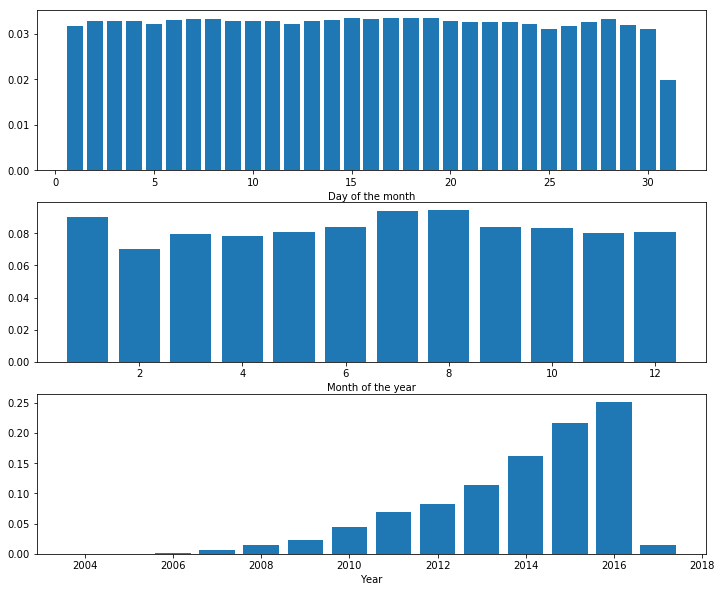

In [24]:

plt.figure(figsize=(12,10))

plt.subplot(311)
frequ_values = (reviews.date_day.value_counts()/reviews.date_day.value_counts().sum()).sort_index()
plt.bar(frequ_values.index,frequ_values)
plt.xlabel("Day of the month",verticalalignment='top')

plt.subplot(312)
frequ_values = (reviews.date_month.value_counts()/reviews.date_month.value_counts().sum()).sort_index()
plt.bar(frequ_values.index,frequ_values)
plt.xlabel("Month of the year",verticalalignment='top')

plt.subplot(313)
frequ_values = (reviews.date_year.value_counts()/reviews.date_year.value_counts().sum()).sort_index()
plt.bar(frequ_values.index,frequ_values)
plt.xlabel("Year",verticalalignment='top')

plt.show()


In [25]:
getDfSummary( reviews )

,mean,std,min,25%,50%,75%,max,number_nan,types,number_distinct
stars,3.722765,1.405131,1.0,3.0,4.0,5.0,5.0,0.0,int64,5
date_year,2013.839790,2.144192,2004.0,2013.0,2014.0,2016.0,2017.0,0.0,int32,14
date_month,6.540899,3.415820,1.0,4.0,7.0,9.0,12.0,0.0,int32,12
date_day,15.750731,8.798195,1.0,8.0,16.0,23.0,31.0,0.0,int32,31


In [26]:
reviews_variables = ['business_id','user_id','date_year','stars','text']

# 2. Create a sample

In [42]:

np.random.seed(10)
shuffle_indices = np.random.permutation(np.arange(len(reviews)))


#### Reviews sample

In [43]:

reviews_sample = reviews[:10000]
reviews_sample = reviews_sample[reviews_variables]

reviews_sample.head(3)



,business_id,user_id,date_year,stars,text
0,2aFiy99vNLklCx3T_tGS9A,KpkOkG6RIf4Ra25Lhhxf1A,2011,5,If you enjoy service by someone who is as comp...
1,2aFiy99vNLklCx3T_tGS9A,bQ7fQq1otn9hKX-gXRsrgA,2010,5,After being on the phone with Verizon Wireless...
2,2aFiy99vNLklCx3T_tGS9A,r1NUhdNmL6yU9Bn-Yx6FTw,2011,5,Great service! Corey is very service oriented....


#### Business sample

In [70]:

groups = reviews[ ['business_id','review_id'] ].groupby('business_id').count()

print "Original number of business", len(groups)
print "Comments distribution:"
print "Std",np.std(groups)
print "Median",np.median(groups)
print "Mean",np.mean(groups)

groupfilter  =  groups

#pd.DataFrame(groupfilter.sort_values(by='review_id',ascending=False)).to_csv("yes.csv")
## percentile 0.98 has 200 reviews
## print len(groupfilter[groupfilter.review_id < 200])    #  ->  140922

groupfilter  = groupfilter[groupfilter.review_id < 200]

sample_size = 10000

print "\nAfter looking at the distribution of reviews per business:\n"
print "We have a mean of ", np.mean(groupfilter), "comments per business"
sample_business_size = int(float(sample_size/np.mean(groupfilter)))
print "We want a sample of ", sample_size, "then we need ", sample_business_size

sample_biz_id = groupfilter.sample( sample_business_size )


Original number of business 144072
Comments distribution:
Std review_id    92.576557
dtype: float64
Median 9.0
Mean review_id    28.826906
dtype: float64

After looking at the distribution of reviews per business:

We have a mean of  review_id    19.626183
dtype: float64 comments per business
We want a sample of  10000 then we need  509


In [71]:

business_sample = reviews[ reviews['business_id'].isin( sample_biz_id.index ) ].reset_index()
business_sample = business_sample[reviews_variables]

business_sample.tail(3)


,business_id,user_id,date_year,stars,text
9751,Te-BqwJZt8S0fu9ltlq3Eg,9PmUzfxz3vamMaTzGSesyg,2014,2,the service at this place is awful .. too slow...
9752,Te-BqwJZt8S0fu9ltlq3Eg,J9ytHx0WNvYofenZ8BZj0w,2016,1,DO NOT waste your time or money going to this ...
9753,Te-BqwJZt8S0fu9ltlq3Eg,0m6Cfsn8KAmzFD01wO_BuA,2015,1,"Good food, but TERRIBLE service. The hostess r..."


#### User sample

In [72]:

groups = reviews[ ['user_id','review_id'] ].groupby('user_id').count()

print "Original number of people", len(groups)
print "Comments distribution:"
print "Std",np.std(groups)
print "Median",np.median(groups)
print "Mean",np.mean(groups)

personfilter =  groups

#pd.DataFrame(personfilter.sort_values(by='review_id',ascending=False)).to_csv("yes.csv")
## percentile 0.98 has 200 reviews
print len(personfilter[personfilter.review_id < 25])    #  ->  1007870

personfilter  = personfilter[personfilter.review_id < 25]

sample_size = 10000

print "\nAfter looking at the distribution of reviews per person:\n"
print "We have a mean of ", np.mean(personfilter), "comments per person"
sample_user_size = int(float(sample_size/np.mean(personfilter)))
print "We want a sample of ", sample_size, "then we need ", sample_user_size

sample_usr_id = personfilter.sample( sample_user_size )


Original number of people 1029432
Comments distribution:
Std review_id    13.990401
dtype: float64
Median 1.0
Mean review_id    4.034409
dtype: float64
1007870

After looking at the distribution of reviews per person:

We have a mean of  review_id    2.786598
dtype: float64 comments per person
We want a sample of  10000 then we need  3588


In [73]:

users_sample = reviews[ reviews['user_id'].isin( sample_usr_id.index ) ].reset_index()
users_sample = users_sample[reviews_variables]

users_sample.tail(3)


,business_id,user_id,date_year,stars,text
10242,v6n4I3fA8eqmO4bnKieOIw,UeQRWJmzsVD-p-viIYIvAg,2014,4,Very nice course. Very well maintained. Beauti...
10243,rD32POdIhGN9eR8aUxl-3A,iaQZQj_FRlQ9HJCQtgJb2Q,2014,2,We love Chipotle and this location used to be ...
10244,oiTq668GwyXo5hMHjdW0kA,GvZiX0sFJpntoAVqRGpIWQ,2016,4,I've been to Stackd twice now and the food was...


# 3. Joining metadata to comments -> Reviews sample

In [63]:

sample_dataset = reviews_sample
sample_dataset.tail(3)


,business_id,user_id,date_year,stars,text
9997,-tLxryf1OpzVP9OSrznprg,b1Qf5tcu5R-kySnNrFPYew,2014,5,I have been putting a focus on my health for t...
9998,-tLxryf1OpzVP9OSrznprg,GS3dVZYhg41LoTNAXWSoUw,2014,5,Dr. Trotter is excellent at what he does. I've...
9999,-tLxryf1OpzVP9OSrznprg,cD35x9Q9ARsJkD5PQfyJOA,2011,5,"Prior to visiting Zentai Wellness, I was havin..."


## 3.1. Join: Reviews and user's info

In [27]:

user_data_selected = users[user_variables]

user_data_selected.columns = [ "usr_"+col if col != "user_id" else col for col in user_data_selected.columns ]
rev_user = pd.merge(sample_dataset, user_data_selected, on = "user_id", how = "left")


In [28]:

rev_user.tail(3)


,business_id,user_id,date_year,stars,text,usr_average_stars,usr_yelping_since_year
9997,-tLxryf1OpzVP9OSrznprg,b1Qf5tcu5R-kySnNrFPYew,2014,5,I have been putting a focus on my health for t...,4.17,2014
9998,-tLxryf1OpzVP9OSrznprg,GS3dVZYhg41LoTNAXWSoUw,2014,5,Dr. Trotter is excellent at what he does. I've...,4.28,2012
9999,-tLxryf1OpzVP9OSrznprg,cD35x9Q9ARsJkD5PQfyJOA,2011,5,"Prior to visiting Zentai Wellness, I was havin...",3.22,2011


## 3.2. Join: Reviews and business info 

In [29]:

business_data_selected = businesses_sparse[business_variables]

business_data_selected.columns = [ "biz_"+col if col != "business_id" else col for col in business_data_selected.columns ]
rev_user_biz = pd.merge(rev_user, business_data_selected, on = "business_id", how = "left")


In [30]:

print(len(rev_user_biz), len(reviews_sample))
rev_user_biz.tail(3)


(10000, 10000)


,business_id,user_id,date_year,stars,text,usr_average_stars,usr_yelping_since_year,biz_is_open,biz_latitude,biz_longitude,...,biz_catBiz_Wine Tours,biz_catBiz_Wineries,biz_catBiz_Wok,biz_catBiz_Women's Clothing,biz_catBiz_Workers Compensation Law,biz_catBiz_Wraps,biz_catBiz_Yelp Events,biz_catBiz_Yoga,biz_catBiz_Ziplining,biz_catBiz_Zoos
9997,-tLxryf1OpzVP9OSrznprg,b1Qf5tcu5R-kySnNrFPYew,2014,5,I have been putting a focus on my health for t...,4.17,2014,1,43.662735,-79.376436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,-tLxryf1OpzVP9OSrznprg,GS3dVZYhg41LoTNAXWSoUw,2014,5,Dr. Trotter is excellent at what he does. I've...,4.28,2012,1,43.662735,-79.376436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999,-tLxryf1OpzVP9OSrznprg,cD35x9Q9ARsJkD5PQfyJOA,2011,5,"Prior to visiting Zentai Wellness, I was havin...",3.22,2011,1,43.662735,-79.376436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.3. Create new variables

In [31]:

rev_user_biz['usr_year_experience'] = rev_user_biz['date_year']-rev_user_biz['usr_yelping_since_year']

import math
rev_user_biz['usr_average_stars'] = rev_user_biz['usr_average_stars'].map(lambda x: 0.5 * math.ceil(2.0 * round(x,1)))
rev_user_biz['usr_stars_bias']= rev_user_biz['usr_average_stars']-rev_user_biz['biz_stars']

rev_user_biz = rev_user_biz.drop('usr_yelping_since_year',axis=1)
rev_user_biz = rev_user_biz.drop('biz_stars',axis=1)
rev_user_biz = rev_user_biz.drop('usr_average_stars',axis=1)


In [32]:
rev_user_biz.head(3)

,business_id,user_id,date_year,stars,text,biz_is_open,biz_latitude,biz_longitude,biz_name,biz_state_AZ,...,biz_catBiz_Wok,biz_catBiz_Women's Clothing,biz_catBiz_Workers Compensation Law,biz_catBiz_Wraps,biz_catBiz_Yelp Events,biz_catBiz_Yoga,biz_catBiz_Ziplining,biz_catBiz_Zoos,usr_year_experience,usr_stars_bias
0,2aFiy99vNLklCx3T_tGS9A,KpkOkG6RIf4Ra25Lhhxf1A,2011,5,If you enjoy service by someone who is as comp...,1,33.662944,-112.018233,SharpieTech,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0
1,2aFiy99vNLklCx3T_tGS9A,bQ7fQq1otn9hKX-gXRsrgA,2010,5,After being on the phone with Verizon Wireless...,1,33.662944,-112.018233,SharpieTech,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.5
2,2aFiy99vNLklCx3T_tGS9A,r1NUhdNmL6yU9Bn-Yx6FTw,2011,5,Great service! Corey is very service oriented....,1,33.662944,-112.018233,SharpieTech,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0


## 3.4. Clean Text 

In [33]:

from nltk.corpus import stopwords
stopw = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [34]:

import re

def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string) 
    #string = re.sub(r'\([^)]*\)', '', string)

    return string.strip().lower()

#cleaned_text = []
#for review in text_variable:
#    cleaned_text.append( [str(word) for word in clean_str(review).split()] )


In [35]:

text_variable = rev_user_biz['text']

cleaned_text = text_variable.map(lambda x: clean_str(x).split())
cleaned_text = pd.Series(cleaned_text).map(lambda x: [word for word in x if word not in stopw] )

binary_vectorizer1 = CountVectorizer(binary=True,ngram_range=(0,2), stop_words=stopw)
clean_review = text_variable.map(lambda x: clean_str(x))
binary_vectorizer1.fit( clean_review )

rev_text_binary = binary_vectorizer1.transform( clean_review )
rev_text_binary


<10000x477242 sparse matrix of type '<type 'numpy.int64'>'
	with 1159818 stored elements in Compressed Sparse Row format>

In [36]:

vocabulary_list1 = list(zip( binary_vectorizer1.vocabulary_.keys(), binary_vectorizer1.vocabulary_.values()) )
vocabulary_list1[0:10]


[(u'', 0),
 (u'served let', 368152),
 (u'say say', 359040),
 (u'mattress ready', 256048),
 (u'dance clubs', 101856),
 (u'fearful food', 151388),
 (u'gah', 170547),
 (u'ppchen tolle', 320292),
 (u'say saw', 359039),
 (u'noon missed', 282115)]

In [37]:

text_variable = rev_user_biz['biz_name']

cleaned_name = text_variable.map(lambda x: clean_str(x).split())
cleaned_name = pd.Series(cleaned_text).map(lambda x: [word for word in x if word not in stopw] )

binary_vectorizer2 = CountVectorizer(binary=True,ngram_range=(0,2), stop_words=stopw)
clean_review = text_variable.map(lambda x: clean_str(x))
binary_vectorizer2.fit( clean_review )

rev_name_binary = binary_vectorizer2.transform( clean_review )
rev_name_binary


<10000x4177 sparse matrix of type '<type 'numpy.int64'>'
	with 50628 stored elements in Compressed Sparse Row format>

In [38]:

vocabulary_list2 = list(zip( binary_vectorizer2.vocabulary_.keys(), binary_vectorizer2.vocabulary_.values()) )
vocabulary_list2[0:10]


[(u'', 0),
 (u'john varvatos', 2047),
 (u'luckenbooth caf', 2340),
 (u'sichuan', 3426),
 (u'asian', 205),
 (u'francesco', 1564),
 (u'battleground', 346),
 (u'canyon park', 671),
 (u'sweetlix', 3692),
 (u'chiropractic health', 801)]

In [39]:

from scipy.sparse import coo_matrix, hstack

stack_txt = hstack( [rev_text_binary, rev_name_binary] )
stack_txt


<10000x481419 sparse matrix of type '<type 'numpy.int64'>'
	with 1210446 stored elements in COOrdinate format>

## 3.5 Pandas to Sparse (numerical and categorical/dummies)

In [40]:

##### Example of sparse matrix for the rest of the data

row1 = [1, 2]
row2 = [3, 4]
row3 = [5, 6]
rows = pd.DataFrame([row1,row2,row3])

print "DataFrame\n", rows
print "\nDataFrame to list\n", rows.transpose().values.tolist()

A = coo_matrix( rows )
print "\nData in Sparse from DataFrame\n", A.toarray()
A


DataFrame
   0  1
0  1  2
1  3  4
2  5  6

DataFrame to list
[[1, 3, 5], [2, 4, 6]]

Data in Sparse from DataFrame
[[1 2]
 [3 4]
 [5 6]]


<3x2 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in COOrdinate format>

In [41]:

names = ['business_id','user_id','review_id','usr_name','biz_name','text']
rev_user_biz_clean = rev_user_biz[ [i for i in rev_user_biz.columns  if i not in names ] ]

rev_user_biz_clean.head(5)


,date_year,stars,biz_is_open,biz_latitude,biz_longitude,biz_state_AZ,biz_state_BW,biz_state_EDH,biz_state_ELN,biz_state_ESX,...,biz_catBiz_Wok,biz_catBiz_Women's Clothing,biz_catBiz_Workers Compensation Law,biz_catBiz_Wraps,biz_catBiz_Yelp Events,biz_catBiz_Yoga,biz_catBiz_Ziplining,biz_catBiz_Zoos,usr_year_experience,usr_stars_bias
0,2011,5,1,33.662944,-112.018233,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0
1,2010,5,1,33.662944,-112.018233,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.5
2,2011,5,1,33.662944,-112.018233,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0
3,2014,5,0,33.504054,-112.082813,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5
4,2014,4,0,33.504054,-112.082813,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5


In [42]:

sparse_rev_user_biz = coo_matrix( rev_user_biz_clean )
sparse_rev_user_biz


<10000x2483 sparse matrix of type '<type 'numpy.float64'>'
	with 132913 stored elements in COOrdinate format>

In [43]:

sparse_rev_user_biz = hstack( [stack_txt, sparse_rev_user_biz] )
sparse_rev_user_biz


<10000x483902 sparse matrix of type '<type 'numpy.float64'>'
	with 1343359 stored elements in COOrdinate format>

In [44]:

import pickle 
pickle.dump( sparse_rev_user_biz, open('../../DataProject/reviews_yelp_sample_preproc.p', 'wb') )


In [52]:

rev_user_biz_clean.loc[:,'biz_name'] = cleaned_name
rev_user_biz_clean.loc[:,'text'] = cleaned_text

rev_user_biz_clean.head(5)


,date_year,stars,biz_is_open,biz_latitude,biz_longitude,biz_state_AZ,biz_state_BW,biz_state_EDH,biz_state_ELN,biz_state_ESX,...,biz_catBiz_Workers Compensation Law,biz_catBiz_Wraps,biz_catBiz_Yelp Events,biz_catBiz_Yoga,biz_catBiz_Ziplining,biz_catBiz_Zoos,usr_year_experience,usr_stars_bias,biz_name,text
0,2011,5,1,33.662944,-112.018233,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0,"[enjoy, service, someone, competent, personabl...","[enjoy, service, someone, competent, personabl..."
1,2010,5,1,33.662944,-112.018233,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.5,"[phone, verizon, wireless, trying, figure, pho...","[phone, verizon, wireless, trying, figure, pho..."
2,2011,5,1,33.662944,-112.018233,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.0,"[great, service, corey, service, oriented, wor...","[great, service, corey, service, oriented, wor..."
3,2014,5,0,33.504054,-112.082813,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5,"[highly, recommended, went, yesterday, looking...","[highly, recommended, went, yesterday, looking..."
4,2014,4,0,33.504054,-112.082813,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0.5,"[walked, looking, specific, piece, furniture, ...","[walked, looking, specific, piece, furniture, ..."


In [46]:

pickle.dump( rev_user_biz_clean, open('../../DataProject/reviews_yelp_sample.p', 'wb') )


# 4. Starting LDA 

Sources : 
    * LDA  and DMR : https://github.com/mpkato/dmr/tree/master/dmr
    * sLDA: https://github.com/arongdari/python-topic-model
    https://github.com/akullpp/SLDA
   

In [47]:

import vocabulary as v
import lda

voca = v.Vocabulary()
docs = voca.read_corpus( rev_user_biz_clean['text'] )


In [48]:

print "vocab",voca.size()
print "reviews",( len(rev_user_biz_clean['text']) )


vocab 37929
reviews 10000


In [49]:

reload(lda)

lda = lda.LDA( 10, 0.1, 0.01, docs, voca.size() )


In [50]:
print lda.alpha
print lda.beta
print lda.perplexity()


0.1
0.01
3945.31748205


In [51]:

lda.topicdist()


array([[ 0.23666667,  0.07      ,  0.07      , ...,  0.10333333,
         0.17      ,  0.07      ],
       [ 0.15      ,  0.15      ,  0.03888889, ...,  0.11296296,
         0.15      ,  0.09444444],
       [ 0.11666667,  0.17222222,  0.00555556, ...,  0.06111111,
         0.17222222,  0.06111111],
       ..., 
       [ 0.10111732,  0.07318436,  0.13463687, ...,  0.10670391,
         0.08435754,  0.10111732],
       [ 0.1       ,  0.05121951,  0.07560976, ...,  0.05121951,
         0.17317073,  0.12439024],
       [ 0.12638889,  0.08472222,  0.12638889, ...,  0.14027778,
         0.1125    ,  0.02916667]])